In [2]:
import numpy as np
import scipy as sp
from matplotlib.pyplot import *
%matplotlib inline
rcParams['figure.figsize'] = (10.0,6.0)

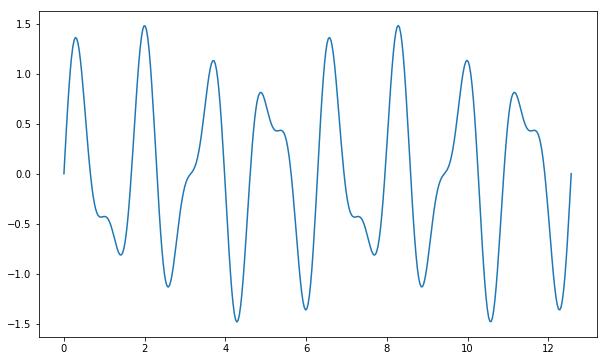

In [3]:
t = np.linspace(0,4*np.pi,400)
wave = np.sin(4*t)+0.5*np.sin(7*t)
plot(t,wave)
show()

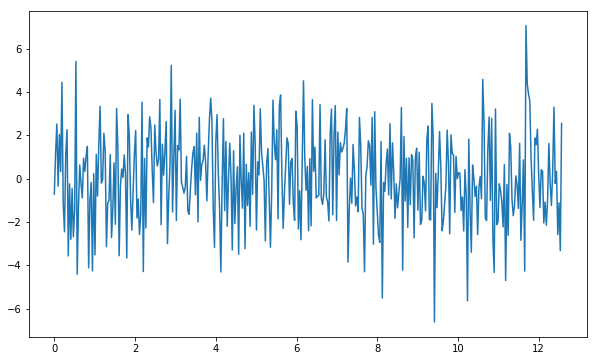

In [23]:
noise = np.random.normal(scale=2,size=400)
plot(t,noise)
show()

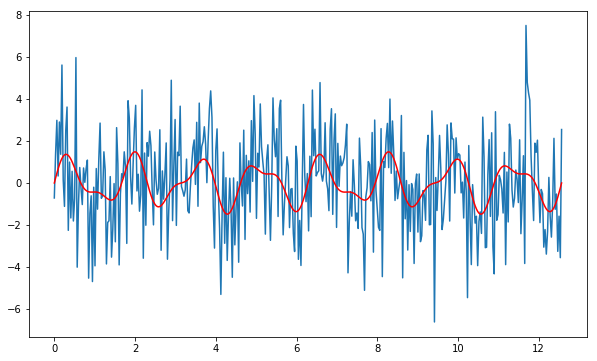

In [24]:
signal = wave+noise
plot(t,signal)
plot(t,wave,c='red')
show()

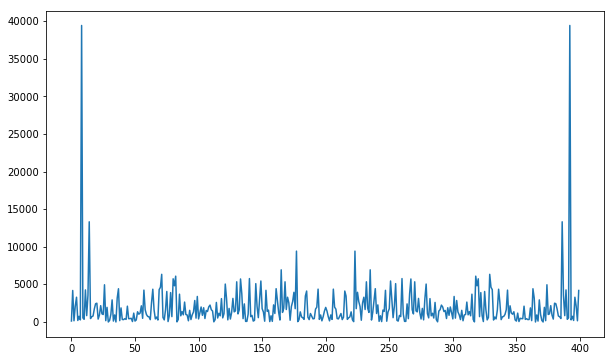

In [25]:
sig_fft=np.fft.fft(signal)
plot(abs(sig_fft)**2)
show()

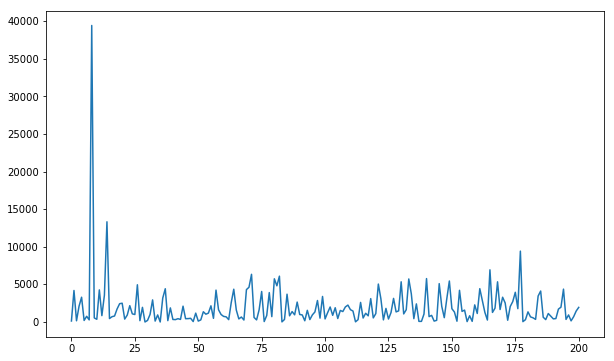

In [26]:
sig_rfft=np.fft.rfft(signal)
power = abs(sig_rfft)**2
plot(power)
show()

In [27]:
print(np.amax(power))
print(np.unravel_index(np.argmax(power),power.shape))
power[np.unravel_index(np.argmax(power),power.shape)]

39448.5248941
(8,)


39448.524894146241

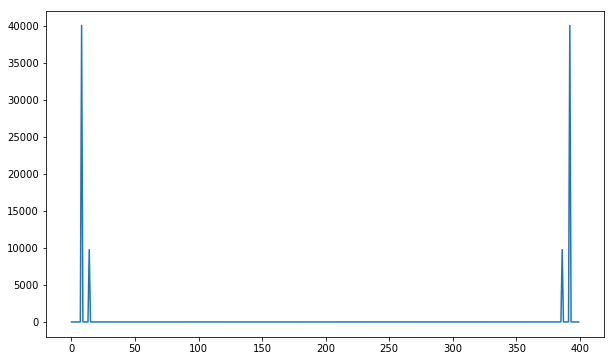

In [28]:
sig_fft2=np.fft.fft(wave)
plot(abs(sig_fft2)**2)
show()

## Shift Theorem Example

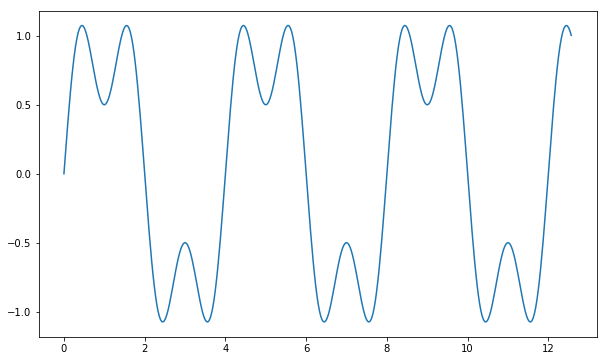

In [4]:
#Let's be a little  more careful defining this wave. We use the true frequency.
wave = np.sin(2*np.pi*0.25*t)+0.5*np.sin(2*np.pi*0.75*t)
plot(t,wave)
show()

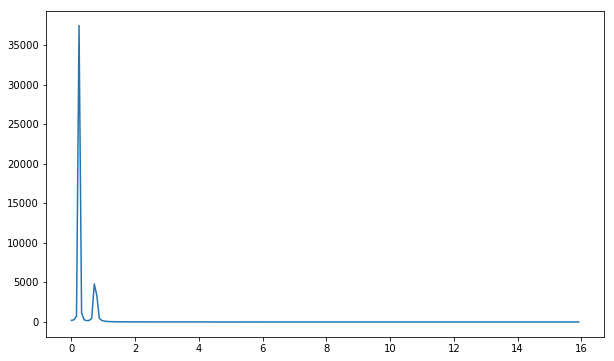

In [6]:
wave_fft=np.fft.rfft(wave) #Take the real Fourier Transform
freq = np.fft.rfftfreq(len(wave),d=(4*np.pi/400)) 
#The function above defines an array of the frequencies that an rfft
#of the length and sampling rate given will sample.
plot(freq,abs(wave_fft)**2)
show()

In [11]:
t_prime = 1.3
shift = np.exp(-2j*np.pi*t_prime*freq)

In [12]:
shifted = np.fft.irfft(shift*wave_fft)

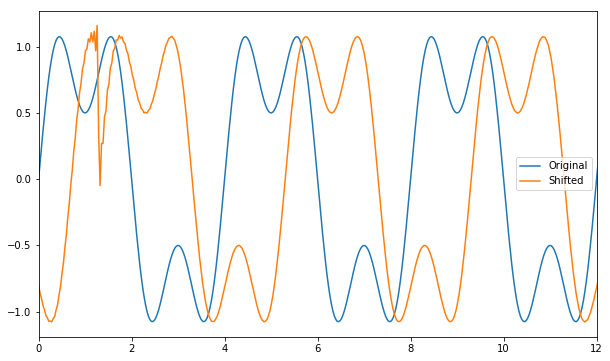

In [13]:
plot(t,wave,label='Original')
plot(t,shifted,label='Shifted')
xlim(0,12)
legend()
show()

In [ ]:
#You can see there are edge effects that one needs to be careful about...